Problema das caixas não-binárias
================================



## Objetivo



Encontrar uma solução para o problema das caixas não-binárias usando um algoritmo genético. Considere 4 caixas. Considere que cada caixa pode ter um valor inteiro dentro do conjunto [0, 100].



## Descrição do problema



O problema das caixas não-binárias é simples: nós temos um certo número de caixas e cada uma pode conter um número inteiro. O objetivo é encontrar uma combinação de caixas onde a soma dos valores contidos dentro delas é máximo.



## Importações



In [1]:
from funcoes import populacao_cnb
from funcoes import funcao_objetivo_pop_cb as funcao_objetivo_pop
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ponto_simples as cruzamento
from funcoes import mutacao_cnb
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 5
NUM_GERACOES = 200
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05

# relacionadas ao problema a ser resulvido
NUM_GENES = 4
VALOR_MAX_CAIXA = 100

In [3]:
# funções locais

def cria_populacao_inicial(tamanho, n_genes):
    return populacao_cnb(tamanho, n_genes, VALOR_MAX_CAIXA)

def mutacao(individuo):
    return mutacao_cnb(individuo, VALOR_MAX_CAIXA)

População original:

[[64, 58, 2, 31], [51, 1, 53, 46], [14, 16, 88, 4], [83, 22, 39, 54], [11, 82, 12, 83]]

População final:

[[86, 86, 61, 86], [33, 86, 61, 86], [86, 86, 61, 86], [33, 86, 61, 86], [86, 86, 61, 86]]



Text(0.5, 1.0, 'Fitness em função da geração')

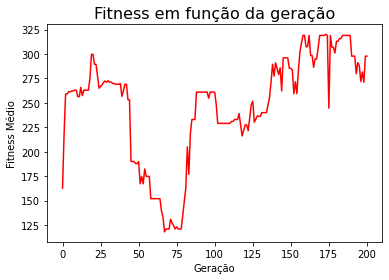

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)
media_fitness = [np.mean(funcao_objetivo_pop(populacao))]

print("População original:")
print()
print(populacao)
print()

for _ in range(NUM_GERACOES):
    # Fazendo a seleção:
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)

    # Fazendo o cruzamento:
    pais = populacao[0::2]
    maes = populacao[1::2]

    contador = 0
    for pai, mae in zip(pais, maes):
        if rd.random() < CHANCE_CRUZAMENTO:
            # vai cruzar :)
            filho1, filho2 = cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
            contador = contador + 2
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao(individuo)
    fitness_depois = funcao_objetivo_pop(populacao)
    media_fitness.append(np.mean(fitness_depois))
print("População final:")
print()
print(populacao)
print()

fig, ax = plt.subplots(1, 1)
ax.plot(range(len(media_fitness)), media_fitness, c = 'r')
ax.set_xlabel("Geração")
ax.set_ylabel("Fitness Médio")
ax.set_title("Fitness em função da geração", fontsize = 16)

## Conclusão

Como conclusão podemos destacar o fato de que, em geral, o fitness da população tendeu a aumentar com o tempo. Porém, também percebemos que há muitas variações abruptas do fitness, que podem ser positivas ou negativas. Isso também torna o experimento menos reprodutível, já que rodando o experimento mais de uma vez vemos pelo grafico que ele se comporta de maneira muito diferente.

## Playground



In [5]:
def histograma(x, density=False, c = 'r', bins = 'sqrt', save = False, legendas = ['x', 'Frequência']):

    fig,axh = plt.subplots(1,1)
    H = plt.hist(x,bins = bins, color = c,density = density)
    axh.set_ylabel(legendas[1],fontsize=12)
    axh.set_xlabel(legendas[0],fontsize=12)
    if save != False:
        plt.savefig(save, dpi=200)

211.43400000000003 +/- 2.1960282830601243


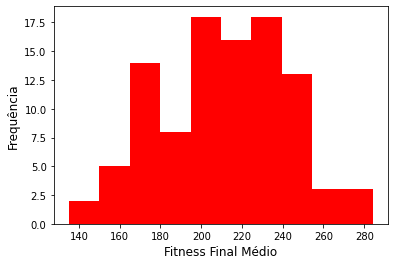

In [6]:
def teste():

    populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)
    media_fitness = [np.mean(funcao_objetivo_pop(populacao))]
    for _ in range(NUM_GERACOES):
        # Fazendo a seleção:
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao, fitness)

        # Fazendo o cruzamento:
        pais = populacao[0::2]
        maes = populacao[1::2]

        contador = 0
        for pai, mae in zip(pais, maes):
            if rd.random() < CHANCE_CRUZAMENTO:
                # vai cruzar :)
                filho1, filho2 = cruzamento(pai, mae)
                populacao[contador] = filho1
                populacao[contador + 1] = filho2
                contador = contador + 2
        for n in range(len(populacao)):
            if rd.random() <= CHANCE_MUTACAO:
                individuo = populacao[n]
                populacao[n] = mutacao(individuo)
        fitness_depois = funcao_objetivo_pop(populacao)
        media_fitness.append(np.mean(fitness_depois))
        return media_fitness[-1]

fitness_final = []
for _ in range(100):
    fitness_final.append(teste())

histograma(fitness_final, legendas = ['Fitness Final Médio', 'Frequência'], bins = 'sqrt')

print(np.mean(fitness_final), '+/-', np.std(fitness_final)/np.sqrt(NUM_GERACOES))

# Estatísticamente está igual a selecionar a população aleatoriamente